Understanding the Data set

Sonar (sound navigation and ranging) is a technique based on the principle of reflection of ultrasonic sound waves. These waves propagate through water and reflect on hitting the ocean bed or any object obstructing its path.Sonar has been widely used in submarine navigation, communication with or detection of objects on or under the water surface (like other vessels), hazard identification, etc.
This dataset was used in Gorman, R. P., and Sejnowski, T. J. (1988). "Analysis of Hidden Units in a Layered Network Trained to Classify Sonar Targets" in Neural Networks, Vol. 1, pp. 75-89.
The CSV files contain data regarding sonar signals bounced off a metal cylinder (mines - M) and a roughly cylindrical rock (rock - R) at various angles and under various conditions.
There are 60 attributes and one categorical column in the dataset.

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [279]:
df=pd.read_csv("sonar mine rock data.csv")

In [281]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X52,X53,X54,X55,X56,X57,X58,X59,X60,y
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      208 non-null    float64
 1   X2      208 non-null    float64
 2   X3      208 non-null    float64
 3   X4      208 non-null    float64
 4   X5      208 non-null    float64
 5   X6      208 non-null    float64
 6   X7      208 non-null    float64
 7   X8      208 non-null    float64
 8   X9      208 non-null    float64
 9   X10     208 non-null    float64
 10  X11     208 non-null    float64
 11  X12     208 non-null    float64
 12  X13     208 non-null    float64
 13  X14     208 non-null    float64
 14  X15     208 non-null    float64
 15  X16     208 non-null    float64
 16  X17     208 non-null    float64
 17  X18     208 non-null    float64
 18  X19     208 non-null    float64
 19  X20     208 non-null    float64
 20  X21     208 non-null    float64
 21  X22     208 non-null    float64
 22  X2

In [285]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [287]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'y'],
      dtype='object')

In [289]:
df.shape

(208, 61)

In [291]:
df["y"].value_counts()

y
M    111
R     97
Name: count, dtype: int64

In [293]:
df.groupby("y").mean()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60
y,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [296]:
x=df.iloc[:,:-1]

In [298]:
x.shape

(208, 60)

In [300]:
Y1=df["y"]

In [302]:
Y1.shape

(208,)

In [239]:
#from imblearn.under_sampling import RandomUnderSampler

In [241]:
#ru=RandomUnderSampler()

In [243]:
#ru_x,Y=ru.fit_resample(x,Y1)

In [245]:
#Y.value_counts()

y
M    97
R    97
Name: count, dtype: int64

In [304]:
from sklearn.preprocessing import StandardScaler

In [306]:
ss=StandardScaler()

In [308]:
X=ss.fit_transform(x)

In [310]:
X

array([[-0.39955135, -0.04064823, -0.02692565, ...,  0.06987027,
         0.17167808, -0.65894689],
       [ 0.70353822,  0.42163039,  1.05561832, ..., -0.47240644,
        -0.44455424, -0.41985233],
       [-0.12922901,  0.60106749,  1.72340448, ...,  1.30935987,
         0.25276128,  0.25758223],
       ...,
       [ 1.00438083,  0.16007801, -0.67384349, ...,  0.90652575,
        -0.03913824, -0.67887143],
       [ 0.04953255, -0.09539176,  0.13480381, ..., -0.00759783,
        -0.70402047, -0.34015415],
       [-0.13794908, -0.06497869, -0.78861924, ..., -0.6738235 ,
        -0.29860448,  0.99479044]])

In [312]:
from sklearn.model_selection import train_test_split

In [317]:
x_train,x_test,y_train,y_test=train_test_split(X,Y1,random_state=2529,test_size=0.3,stratify=Y1)

In [319]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((145, 60), (63, 60), (145,), (63,))

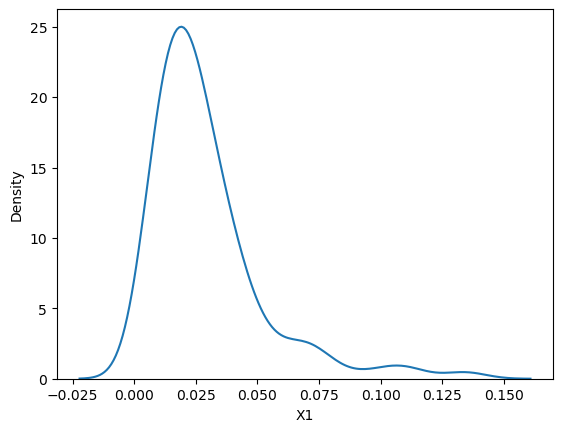

In [70]:
sns.kdeplot(data=df["X1"])
plt.show()

<Axes: ylabel='X1'>

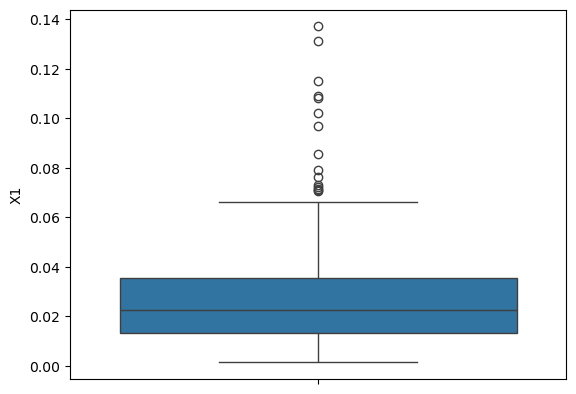

In [72]:
sns.boxplot(data=df["X1"])

MODEL TRAIN

In [321]:
from sklearn.naive_bayes import GaussianNB

In [323]:
GNB=GaussianNB()

In [325]:
GNB.fit(x_train,y_train)

GaussianNB()

In [267]:
y_pred=GNB.predict(x_test)

In [327]:
y_pred.shape

(59,)

In [329]:
y_pred

array(['M', 'R', 'R', 'M', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'M', 'R', 'M', 'M', 'R', 'M', 'R', 'R', 'R', 'R', 'R', 'R',
       'M', 'M', 'M', 'R', 'M', 'M', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'M', 'R', 'R', 'R', 'R', 'R', 'M', 'R', 'R', 'M', 'M', 'R', 'M',
       'M', 'R', 'R', 'R', 'R', 'R', 'R'], dtype='<U1')

In [331]:
GNB.score(x_test,y_test)*100

71.42857142857143

In [333]:
GNB.score(x_train,y_train)*100

73.10344827586206

In [80]:
GNB.predict_proba(x_test)

array([[1.00000000e+00, 1.47715276e-28],
       [4.39129046e-02, 9.56087095e-01],
       [1.00000000e+00, 6.89472335e-22],
       [1.00000000e+00, 7.94109124e-16],
       [7.74055191e-01, 2.25944809e-01],
       [4.10949745e-09, 9.99999996e-01],
       [3.46952852e-03, 9.96530471e-01],
       [1.03088788e-07, 9.99999897e-01],
       [3.78599584e-02, 9.62140042e-01],
       [1.45611424e-06, 9.99998544e-01],
       [7.21923656e-03, 9.92780763e-01],
       [2.64810047e-02, 9.73518995e-01],
       [6.38196302e-03, 9.93618037e-01],
       [7.48852904e-03, 9.92511471e-01],
       [1.00000000e+00, 7.15680788e-15],
       [1.00000000e+00, 6.43602960e-19],
       [9.99999969e-01, 3.12654827e-08],
       [9.82453164e-01, 1.75468358e-02],
       [3.74605118e-02, 9.62539488e-01],
       [9.60110482e-01, 3.98895183e-02],
       [1.00000000e+00, 8.16559085e-35],
       [1.54611974e-11, 1.00000000e+00],
       [9.74086777e-01, 2.59132235e-02],
       [9.99998904e-01, 1.09583954e-06],
       [1.000000

In [82]:
from sklearn.metrics import confusion_matrix,classification_report

In [84]:
cm=confusion_matrix(y_test,y_pred)

In [86]:
cm

array([[25,  5],
       [ 4, 25]], dtype=int64)

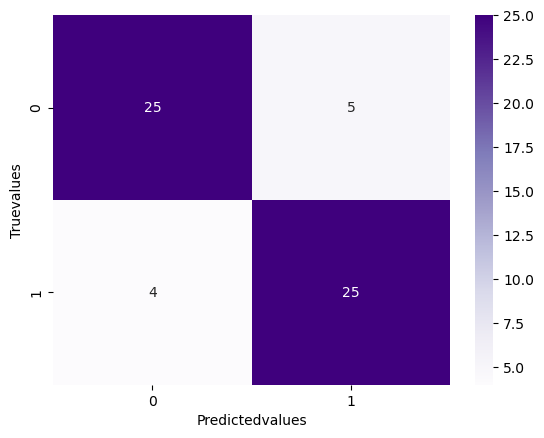

In [88]:
sns.heatmap(cm,annot=True,cmap="Purples")
plt.xlabel("Predictedvalues")
plt.ylabel("Truevalues")
plt.show()

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           M       0.86      0.83      0.85        30
           R       0.83      0.86      0.85        29

    accuracy                           0.85        59
   macro avg       0.85      0.85      0.85        59
weighted avg       0.85      0.85      0.85        59



In [104]:
x_new=df.sample(1)

In [106]:
x_new.shape

(1, 61)

In [108]:
x_new

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X52,X53,X54,X55,X56,X57,X58,X59,X60,y
163,0.0072,0.0027,0.0089,0.0061,0.042,0.0865,0.1182,0.0999,0.1976,0.2318,...,0.0078,0.0071,0.0081,0.0034,0.0064,0.0037,0.0036,0.0012,0.0037,M


In [110]:
x_new=x_new.drop("y",axis=1)

In [112]:
x_new.shape

(1, 60)

In [114]:
x_new=ss.fit_transform(x_new)

In [116]:
y_p=GNB.predict(x_new)

In [124]:
y_p

array(['R'], dtype='<U1')

In [122]:
GNB.predict_proba(x_new)

array([[0.05530196, 0.94469804]])